# Environment

In [1]:
import os
os.chdir('../..')
import sys
sys.path.append('.')

In [2]:
import pickle
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading

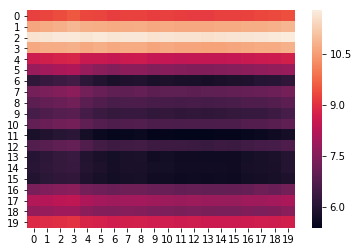

In [27]:
sns.heatmap(np.stack(data.iloc[3000:3100]['distances'].values).mean(axis=0))

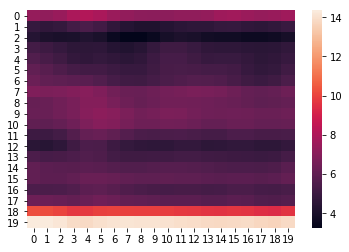

In [28]:
sns.heatmap(data.iloc[2208].distances)

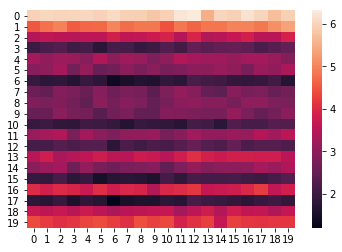

In [29]:
sns.heatmap(data.iloc[1].distances)

In [125]:
data.iloc[:100].reset_index().groupby(['level_0', 'level_1'])['distances'].apply(lambda S: np.stack(S.values))

level_0  level_1     
DRRD 7   no_smoothing    [[[6.037173052255591, 5.935483289535898, 6.178...
Name: distances, dtype: object

In [117]:
simmat = data.iloc[:100].reset_index().groupby(['level_0', 'level_1']).apply(lambda df: np.stack(df.distances.values).mean(axis=0))

In [118]:
simmat.values

array([array([[4.71892805, 4.60932419, 4.67189176, ..., 4.6746528 , 4.73629125,
        4.69194469],
       [4.19555285, 4.2050322 , 4.20375209, ..., 4.28912572, 4.34461057,
        4.27940525],
       [5.04147748, 5.00741474, 5.02966844, ..., 5.10531156, 5.13082713,
        5.15880915],
       ...,
       [5.580113  , 5.63258378, 5.57600534, ..., 5.64581741, 5.59003343,
        5.5852385 ],
       [4.94778584, 5.14602844, 5.10002776, ..., 5.13771972, 5.06221836,
        5.03001026],
       [4.55502084, 4.56562111, 4.62362735, ..., 4.5873365 , 4.56628003,
        4.48778671]])], dtype=object)

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


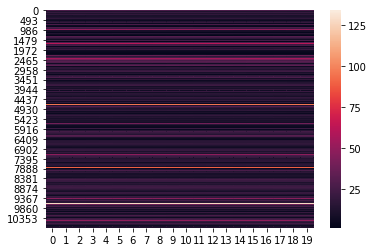

In [56]:
sns.heatmap(np.vstack(data.distances['DRRD 10', 'no_smoothing'].values))

# Figures 

## Removing baseline

In [60]:
data = pickle.load(open('data/results/consistency_of_activity_no_baseline.pickle', 'rb'))
data = pd.DataFrame([i for i in data.values()], index=data.keys(), columns=['distances'])
dists = data.distances.apply(lambda x: x.diagonal().mean())

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.


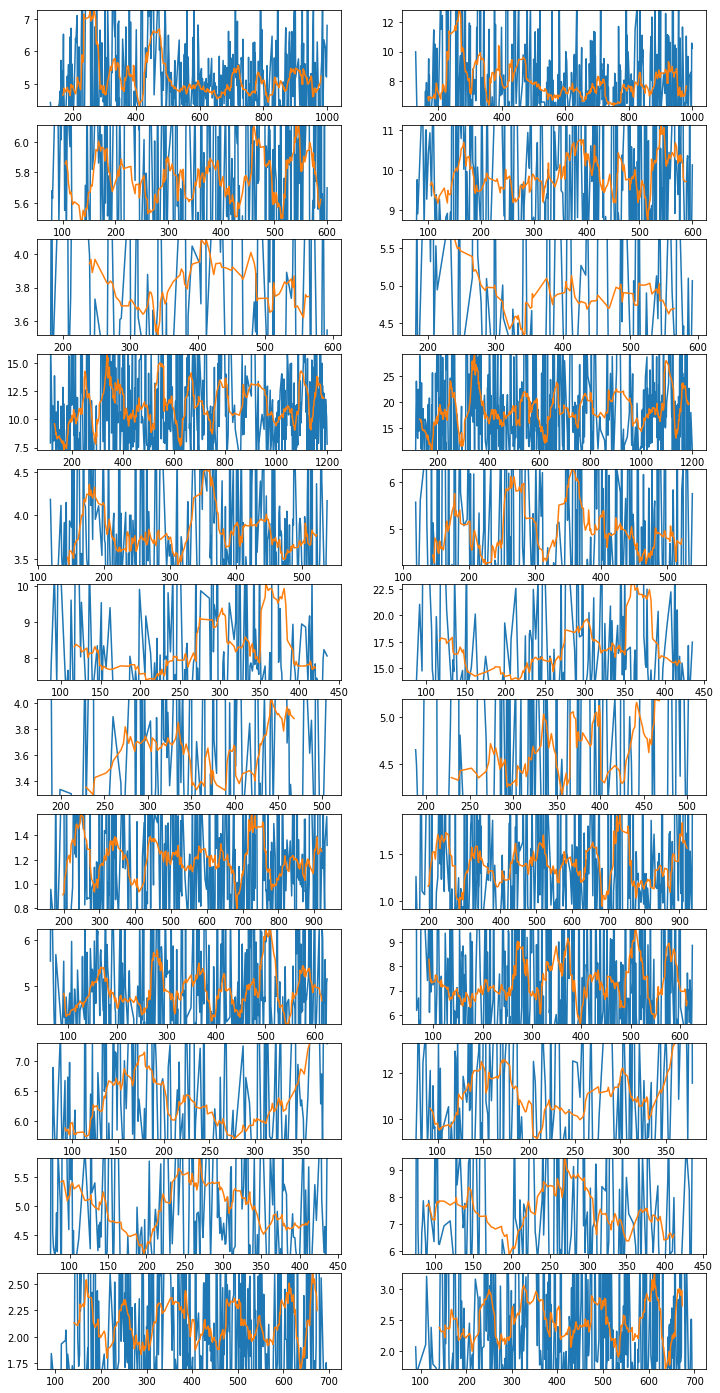

In [61]:
plt.figure(figsize=(12,25))
for i, rat in enumerate(data.reset_index().level_0.unique()):
    plt.subplot(12, 2, 2*i+1)
    dists.loc[rat, 'wide_smoothed'].plot()
    moving_average = dists.loc[rat, 'wide_smoothed'].rolling(20, center=True).mean()
    moving_average.plot()
    plt.ylim(moving_average.min(),moving_average.max())
    plt.subplot(12, 2, 2*i+2)
    dists.loc[rat, 'no_smoothing'].plot()
    moving_average = dists.loc[rat, 'no_smoothing'].rolling(20, center=True).mean()
    moving_average.plot()
    plt.ylim(moving_average.min(),moving_average.max())

## Not Removing baseline

In [58]:
data = pickle.load(open('data/results/consistency_of_activity.pickle', 'rb'))
data = pd.DataFrame([i for i in data.values()], index=data.keys(), columns=['distances'])
dists = data.distances.apply(lambda x: x.diagonal().mean())

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/ipykernel/__main__.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.


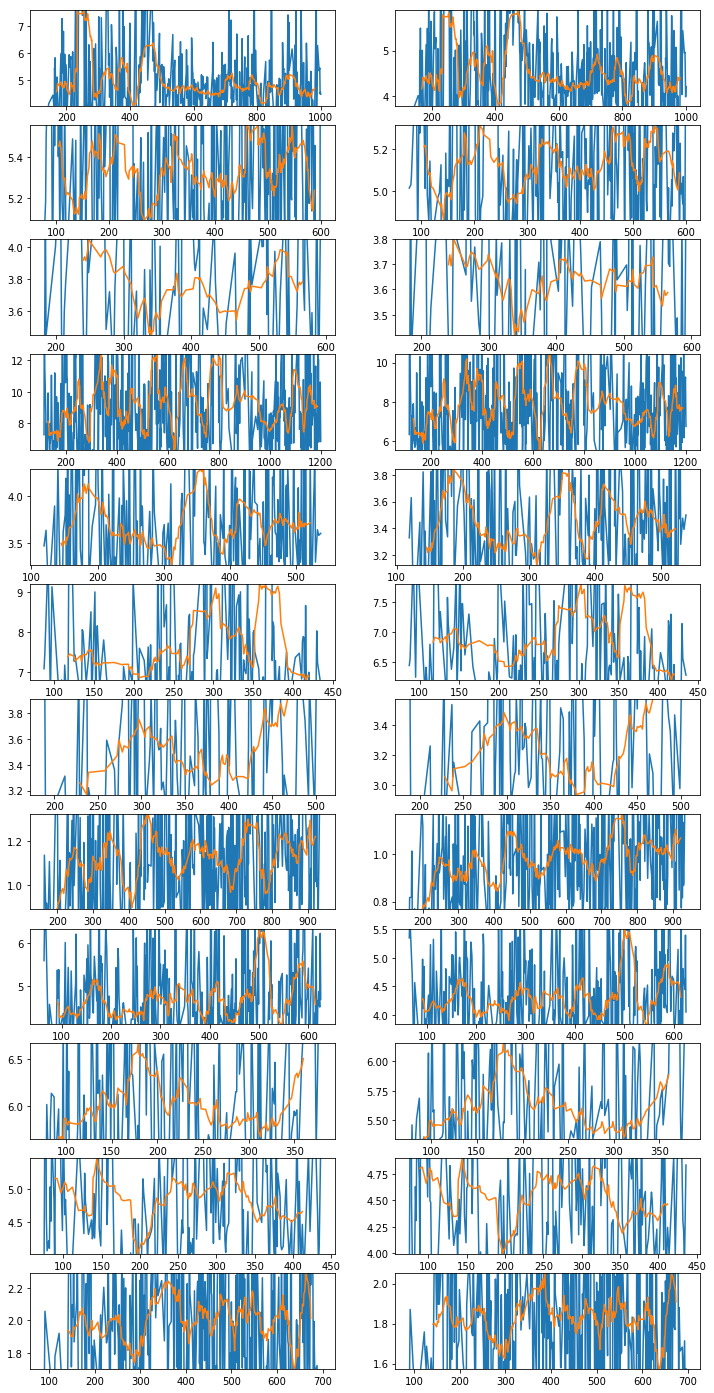

In [59]:
plt.figure(figsize=(12,25))
for i, rat in enumerate(data.reset_index().level_0.unique()):
    plt.subplot(12, 2, 2*i+1)
    dists.loc[rat, 'wide_smoothed'].plot()
    moving_average = dists.loc[rat, 'wide_smoothed'].rolling(20, center=True).mean()
    moving_average.plot()
    plt.ylim(moving_average.min(),moving_average.max())
    plt.subplot(12, 2, 2*i+2)
    dists.loc[rat, 'no_smoothing'].plot()
    moving_average = dists.loc[rat, 'no_smoothing'].rolling(20, center=True).mean()
    moving_average.plot()
    plt.ylim(moving_average.min(),moving_average.max())

In [34]:
from scipy.stats import pearsonr

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


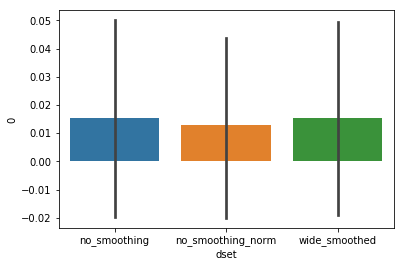

In [62]:
dfists = dists.reset_index()
dfists.columns = ['rat', 'dset', 'trial', 'distance']
dfists = dfists.groupby(['rat', 'dset']).apply(lambda df: pearsonr(df.trial, df.distance)[0]).reset_index()
sns.barplot(x='dset', y=0, data=dfists)

In [37]:
pearsonr(dists['DRRD 10', 'no_smoothing'].index, dists['DRRD 10', 'no_smoothing'].values)

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


(0.008237196857133927, 0.8482672106234705)